<a href="https://colab.research.google.com/github/Kush-Singh-26/Learning-Pytorch/blob/main/Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from torchvision import models
from PIL import Image

import torchvision
import os
import matplotlib.pyplot as plt
import torch

plt.style.use('ggplot')

In [3]:
fcn = models.segmentation.fcn_resnet101(
    weights=models.segmentation.FCN_ResNet101_Weights.DEFAULT
).eval()

Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet101_coco-7ecb50ca.pth
100%|██████████| 208M/208M [00:02<00:00, 103MB/s]


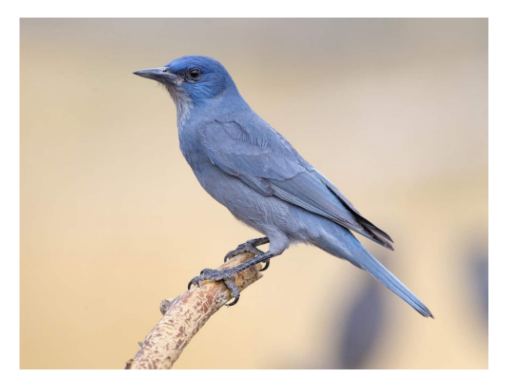

In [4]:
img = Image.open('download.png').convert('RGB')
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
import torchvision.transforms as T
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(),
                 T.Normalize(mean = [0.485, 0.456, 0.406],
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

In [7]:
out = fcn(inp)['out']
print(out.shape)

torch.Size([1, 21, 224, 224])


In [8]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)
print (np.unique(om))

(224, 224)
[0 3]


In [9]:
def decode_segmap(image, nc=21):

    label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)

    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]

    rgb = np.stack([r, g, b], axis=2)
    return rgb

In [ ]:
rgb = decode_segmap(om)
plt.figure(figsize=(12, 9))
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [ ]:
def segment(net, path, show_orig=True, dev='cpu'):
    plt.figure(figsize=(10, 7))
    img = Image.open(path).convert('RGB')
    if show_orig:
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    trf = T.Compose([T.ToTensor(),
                     T.Normalize(mean = [0.485, 0.456, 0.406],
                               std = [0.229, 0.224, 0.225])])
    inp = trf(img).unsqueeze(0).to(dev)
    out = net.to(dev)(inp)['out']
    om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
    rgb = decode_segmap(om)
    plt.figure(figsize=(10, 7))
    plt.imshow(rgb)
    plt.axis('off')
    plt.show()

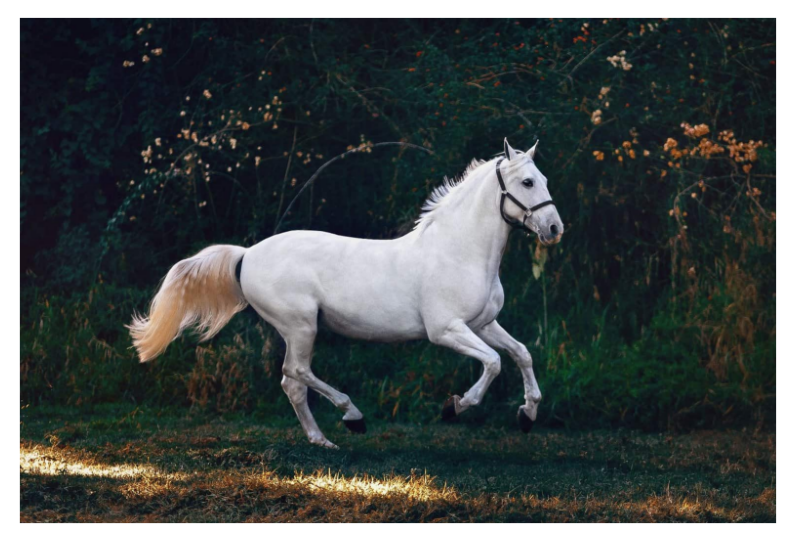

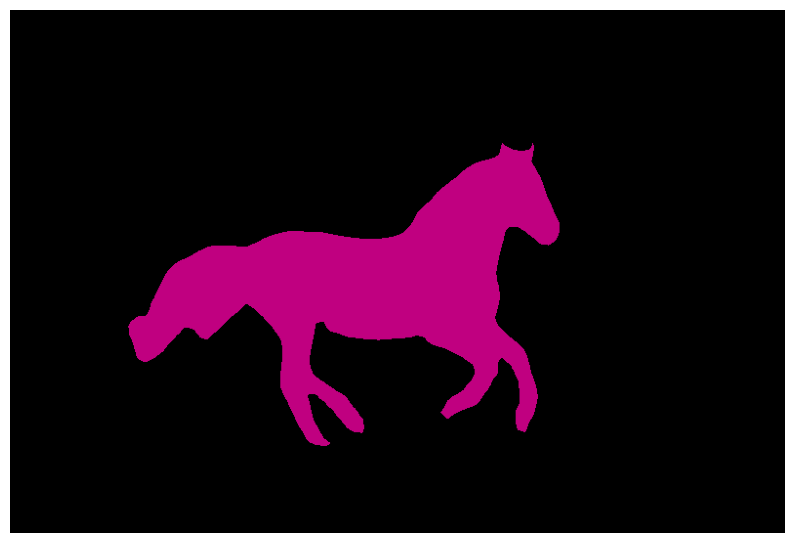

In [20]:
segment(fcn, 'download.png')